In [26]:
import pandas as pd;


In [27]:
import os

path = 'd:/BankingDomainAnalysis/C8_Input_Files/C8_Input_Files'
print(os.listdir(path))  # 

['dim_customers.csv', 'fact_spends.csv', 'How to Get Started (A Step-by-Step Guide).pdf', 'Insight Ideas from Tony.pdf', 'meta_data.txt', 'problem_statement.pdf']


In [28]:
df = pd.read_csv('d:/BankingDomainAnalysis/C8_Input_Files/C8_Input_Files/dim_customers.csv')

# Display the first few rows
df.head()

,customer_id,age_group,city,occupation,gender,marital status,avg_income
0,ATQCUS1825,45+,Bengaluru,Salaried IT Employees,Male,Married,73523
1,ATQCUS0809,25-34,Hyderabad,Salaried Other Employees,Male,Married,39922
2,ATQCUS0663,25-34,Chennai,Salaried Other Employees,Male,Married,37702
3,ATQCUS0452,25-34,Delhi NCR,Government Employees,Male,Married,54090
4,ATQCUS3350,21-24,Bengaluru,Freelancers,Male,Single,28376


In [29]:
df1 = pd.read_csv('d:/BankingDomainAnalysis/C8_Input_Files/C8_Input_Files/fact_spends.csv', index_col=0)

In [30]:
df1.head()

,month,category,payment_type,spend
customer_id,,,,
ATQCUS1371,July,Health & Wellness,Credit Card,1114
ATQCUS0368,October,Groceries,Credit Card,1466
ATQCUS0595,May,Health & Wellness,Credit Card,387
ATQCUS0667,October,Electronics,Credit Card,1137
ATQCUS3477,September,Bills,UPI,2102


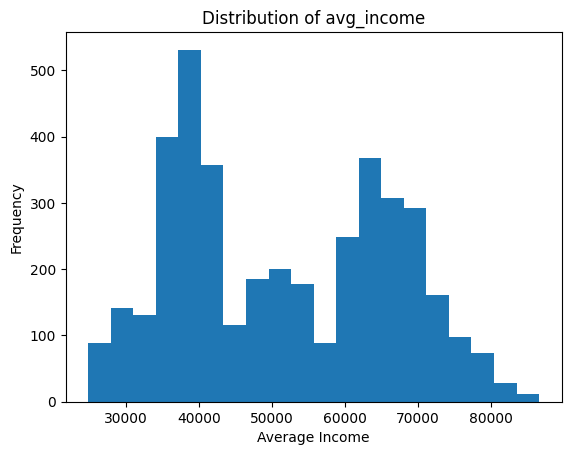

In [31]:
import matplotlib.pyplot as plt

plt.hist(df['avg_income'], bins=20)
plt.xlabel('Average Income')
plt.ylabel('Frequency')
plt.title('Distribution of avg_income')
plt.show()

In [32]:
print(df['city'].unique())

['Bengaluru' 'Hyderabad' 'Chennai' 'Delhi NCR' 'Mumbai']


In [48]:
df['adjusted_income'] = df.apply(
    lambda row: row['avg_income'] / 1.5 if row['marital status'] == 'Married' else row['avg_income'],
    axis=1
)

# Calculate the median of the adjusted income
median_adjusted_income = df['adjusted_income'].median()

# Assign income group based on adjusted median
df['income_group'] = df['adjusted_income'].apply(
    lambda x: 'High' if x >= median_adjusted_income else 'Low'
)

# Show the count of each group
print(df['income_group'].value_counts())

High    2000
Low     2000
Name: income_group, dtype: int64


In [49]:
df.head()

,customer_id,age_group,city,occupation,gender,marital status,avg_income,income_group,adjusted_income
0,ATQCUS1825,45+,Bengaluru,Salaried IT Employees,Male,Married,73523,High,49015.333333
1,ATQCUS0809,25-34,Hyderabad,Salaried Other Employees,Male,Married,39922,Low,26614.666667
2,ATQCUS0663,25-34,Chennai,Salaried Other Employees,Male,Married,37702,Low,25134.666667
3,ATQCUS0452,25-34,Delhi NCR,Government Employees,Male,Married,54090,Low,36060.000000
4,ATQCUS3350,21-24,Bengaluru,Freelancers,Male,Single,28376,Low,28376.000000


In [37]:
spending_per_customer = df1.groupby('customer_id')['spend'].sum().reset_index()
spending_per_customer.head()

,customer_id,spend
0,ATQCUS0001,170545
1,ATQCUS0002,168514
2,ATQCUS0003,157534
3,ATQCUS0004,162655
4,ATQCUS0005,157296


In [41]:
# Group the spending data by month and customer_id, then sum the spend for each group
monthly_spend = (
    df1
    .groupby(['month', 'customer_id'])['spend']
    .sum()
    .reset_index()
    .rename(columns={'spend': 'total_monthly_spend'})
)

# Display the first few rows
monthly_spend.head()

,month,customer_id,total_monthly_spend
0,August,ATQCUS0001,33776
1,August,ATQCUS0002,29343
2,August,ATQCUS0003,26112
3,August,ATQCUS0004,31519
4,August,ATQCUS0005,28033


In [43]:
# First, group to get monthly spend per customer
monthly_spend = (
    df1
    .groupby(['month', 'customer_id'])['spend']
    .sum()
    .reset_index()
)

# Now, filter for a specific customer_id, e.g., 1
customer_id = 'ATQCUS0001'	  # You can change this to any ID
customer_monthly_spend = monthly_spend[monthly_spend['customer_id'] == customer_id]

# Display the result
print(customer_monthly_spend)

           month customer_id  spend
0         August  ATQCUS0001  33776
4000        July  ATQCUS0001  29451
8000        June  ATQCUS0001  26316
12000        May  ATQCUS0001  19480
16000    October  ATQCUS0001  25262
20000  September  ATQCUS0001  36260


In [50]:
print(df1['category'].unique())

['Health & Wellness' 'Groceries' 'Electronics' 'Bills' 'Entertainment'
 'Apparel' 'Food' 'Others' 'Travel']


In [51]:
# Group by customer and category, sum the spend
customer_category_spend = (
    df1.groupby(['customer_id', 'category'])['spend']
    .sum()
    .reset_index()
)

# For each customer, find the category with the maximum spend
idx = customer_category_spend.groupby('customer_id')['spend'].idxmax()
top_category_per_customer = customer_category_spend.loc[idx].reset_index(drop=True)

In [55]:
print(top_category_per_customer)

     customer_id           category  spend
0     ATQCUS0001      Entertainment  45144
1     ATQCUS0002      Entertainment  39911
2     ATQCUS0003      Entertainment  40910
3     ATQCUS0004      Entertainment  42729
4     ATQCUS0005      Entertainment  39975
...          ...                ...    ...
3995  ATQCUS3996  Health & Wellness  16839
3996  ATQCUS3997  Health & Wellness  10038
3997  ATQCUS3998             Travel  10687
3998  ATQCUS3999  Health & Wellness  11889
3999  ATQCUS4000              Bills   8578

[4000 rows x 3 columns]


In [56]:
# Merge income_group and adjusted_income from df to top_category_per_customer using customer_id
top_category_per_customer = top_category_per_customer.merge(
    df[['customer_id', 'income_group', 'adjusted_income']],
    on='customer_id',
    how='left'
)

# Add spend_per_month column (spend divided by 12)
top_category_per_customer['spend_per_month'] = (top_category_per_customer['spend'] / 12).round(2)

# Remove decimals from adjusted_income column
top_category_per_customer['adjusted_income'] = top_category_per_customer['adjusted_income'].astype(int)

# Display the result
print(top_category_per_customer.head())

  customer_id       category  spend income_group  adjusted_income  \
0  ATQCUS0001  Entertainment  45144          Low            33178   
1  ATQCUS0002  Entertainment  39911          Low            31557   
2  ATQCUS0003  Entertainment  40910          Low            32567   
3  ATQCUS0004  Entertainment  42729          Low            30283   
4  ATQCUS0005  Entertainment  39975          Low            31154   

   spend_per_month  
0          3762.00  
1          3325.92  
2          3409.17  
3          3560.75  
4          3331.25  


In [57]:
# Calculate average income utilization % by dividing adjusted_income by spend_per_month
top_category_per_customer['income_utilization_pct'] = (
    (top_category_per_customer['spend_per_month'] / top_category_per_customer['adjusted_income']) * 100
).round(2)

# Display the result
print(top_category_per_customer.head())

  customer_id       category  spend income_group  adjusted_income  \
0  ATQCUS0001  Entertainment  45144          Low            33178   
1  ATQCUS0002  Entertainment  39911          Low            31557   
2  ATQCUS0003  Entertainment  40910          Low            32567   
3  ATQCUS0004  Entertainment  42729          Low            30283   
4  ATQCUS0005  Entertainment  39975          Low            31154   

   spend_per_month  income_utilization_pct  
0          3762.00                   11.34  
1          3325.92                   10.54  
2          3409.17                   10.47  
3          3560.75                   11.76  
4          3331.25                   10.69  


In [60]:
# Divide income_utilization_pct into four equal categories (quartiles)
labels = ['Very Low', 'Low', 'High', 'Very High']
top_category_per_customer['utilization_group'] = pd.qcut(
    top_category_per_customer['income_utilization_pct'],
    q=4,
    labels=labels
)

# Display the result
print(top_category_per_customer[['income_utilization_pct', 'utilization_group']])

      income_utilization_pct utilization_group
0                      11.34         Very High
1                      10.54         Very High
2                      10.47         Very High
3                      11.76         Very High
4                      10.69         Very High
...                      ...               ...
3995                    2.06          Very Low
3996                    2.51          Very Low
3997                    2.67          Very Low
3998                    2.65          Very Low
3999                    1.40          Very Low

[4000 rows x 2 columns]


In [61]:
# Save the top_category_per_customer DataFrame to a new CSV file
top_category_per_customer.to_csv('top_category_per_customer.csv', index=False)
print("CSV file created: top_category_per_customer.csv")

CSV file created: top_category_per_customer.csv
